<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/12_Componentes_Fuertemente_Conexos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

In [2]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [3]:
%%file 1.in

4
8
6
7
2
9
1
5 6
3 7

Writing 1.in


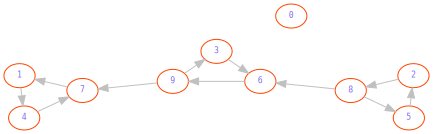

In [4]:
G, _ = readAdjl('1.in')
adjlShow(G, directed=True)

#Kosaraju

In [5]:
def reverse(G):
  n =len(G)
  Grev = [[] for _ in range(n)]
  for u in range(n):
    for v in G[u]:
      Grev[v].append(u)
  return Grev

In [6]:
def kosaraju(G):
  n = len(G)
  visited = [False]*n
  f = []

  #Producir grafo reverso
  Grev = reverse(G)

  #Producir orden de finalizacion con dfs sobre grafo reverso
  def dfs1(u):
    visited[u] = True
    for v in Grev[u]:
      if not visited[v]:
        dfs1(v)
    f.append(u)

  def dfs2(u, scc):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs2(v, scc)
    scc.append(u)

  for u in range(n):
    if not visited[u]:
      dfs1(u)

  scc = []
  visited = [False]*n
  for u in reversed(f):
    if not visited[u]:
      scc.append([])
      dfs2(u, scc[-1])

  return scc

In [7]:
kosaraju(G)

[[7, 4, 1], [6, 3, 9], [2, 5, 8], [0]]

#Algoritmo exhaustivo

In [8]:
#Para cada nodo x hacer
#  CFC[x] = x // cada nodo esta en su propia CFC
#  Para cada arista x→y hacer
#    Si CFC[x] != CFC[y] entonces
#      Para cada nodo z hacer
#        Si CFC[z]==CFC[y] entonces CFC[z]=CFC[x]

In [9]:
def algExh(G):
  n =len(G)
  CFC = [i for i in range(n)]
  for x in range(n):
    for y in G[x]:
      if (CFC[x] != CFC[y] and CFC[y] == y):
        for z in range(n):
          if (CFC[z] == CFC[y]):
              CFC[z] = CFC[x]
    
  return CFC

In [10]:
cfc = algExh(G)
print(cfc)

[0, 1, 2, 3, 1, 2, 3, 1, 2, 3]


In [11]:
scc = dict()
for i, j in enumerate(cfc):
  if j not in scc.keys():
    scc[j] = [i]
  else:
    scc[j].append(i)

print(scc)

{0: [0], 1: [1, 4, 7], 2: [2, 5, 8], 3: [3, 6, 9]}
